<a href="https://colab.research.google.com/github/Surya-Teja-Varma/Projects/blob/main/Varma's_financial_market_news_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project: ***Financial Market News Sentiment Analysis***


Objective:
Predict the sentiment (positive/negative) of financial market news articles to analyze trends and market movements using Natural Language Processing (NLP) techniques.


Data Source:
Data: Can be financial news data from Kaggle or a web scraping tool like BeautifulSoup.
Example dataset: Financial News Dataset.

In [ ]:
#1. Import Library
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving all-data.csv to all-data.csv


In [ ]:
#2. Import Data
import pandas as pd

# Try loading the CSV with a different encoding
data = pd.read_csv('all-data.csv', encoding='ISO-8859-1')

# Check the first few rows of the dataset to ensure it loaded correctly
data.head()



,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
#3. Describe Data
data.head()

data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


,0
neutral,0
"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",0


In [ ]:
# Check the column names to ensure you have the correct name for sentiment
print(data.columns)


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


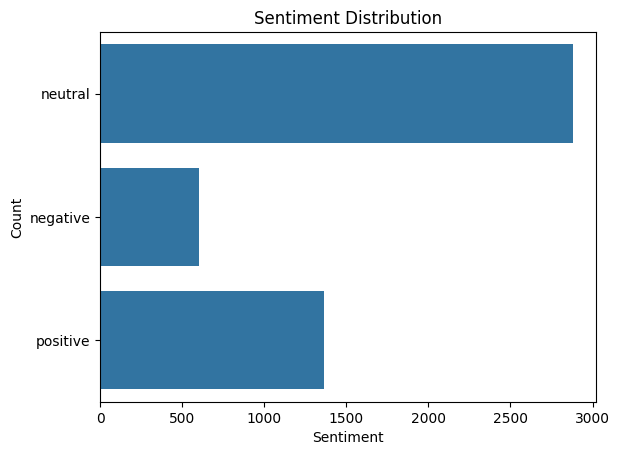

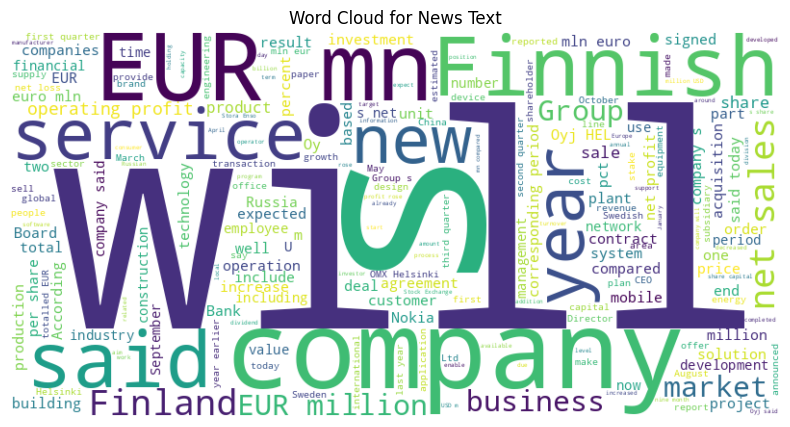

In [ ]:
#4. data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for sentiment distribution
sns.countplot(data['neutral'])  # 'neutral' is the sentiment column
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Optional: Word Cloud for neutral sentiment (assuming there's only neutral sentiment)
from wordcloud import WordCloud

# Since there's only 'neutral', let's try visualizing the text data
text_data = ' '.join(data['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'])

# Generate word cloud for the text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Text')
plt.show()




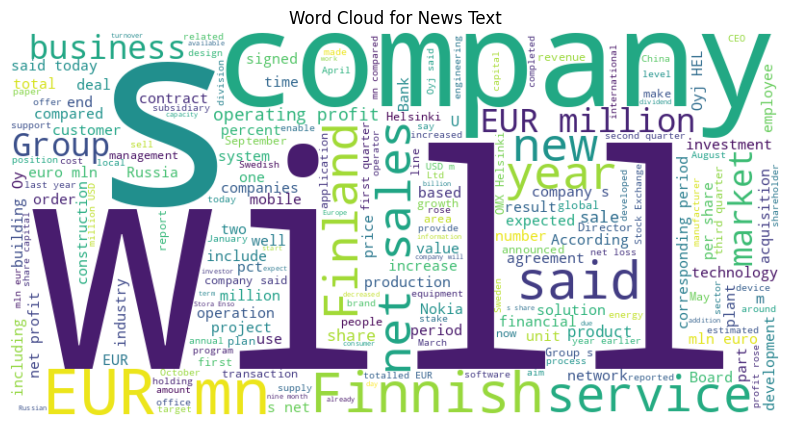

In [ ]:
#5. Data Preprocessing
# Extract the text from the unusually named column
text_column_name = 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

# Use the actual column name to extract the text data
text_data = ' '.join(data[text_column_name])

# Generate a word cloud for the text data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for the text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Text')
plt.show()


In [ ]:
#6. Define Target Variable (y) and Feature Variables (X)
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords list if you haven't done so
nltk.download('stopwords')

# Create a function to clean the text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Assuming the text column name is still the unusual one
text_column_name = 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

# Clean the text data in the DataFrame
data['cleaned_headline'] = data[text_column_name].apply(clean_text)

# Check the cleaned text
print(data['cleaned_headline'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    technopolis plans develop stages area less squ...
1    international electronic industry company elco...
2    new production plant company would increase ca...
3    according company updated strategy years baswa...
4    financing aspocomp growth aspocomp aggressivel...
Name: cleaned_headline, dtype: object


In [ ]:
#7. Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Define X and y
X = data['cleaned_headline']  # Feature
y = data['neutral']            # Target variable (ensure this is the correct column)

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Vectorization
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
##9. Modeling
model = LogisticRegression(max_iter=1000)  # Logistic Regression model
model.fit(X_train_tfidf, y_train)  # Fit the model to the training data

# Check the training accuracy
train_accuracy = model.score(X_train_tfidf, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.85


In [ ]:
#10. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Generate the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.40      0.52       115
     neutral       0.72      0.94      0.81       567
    positive       0.78      0.45      0.57       287

    accuracy                           0.73       969
   macro avg       0.74      0.59      0.63       969
weighted avg       0.74      0.73      0.70       969

[[ 46  59  10]
 [  9 531  27]
 [  8 151 128]]


In [ ]:
# Step 11: Save the Model (Optional)
joblib.dump(model, 'sentiment_model.pkl')
print("Model saved as 'sentiment_model.pkl'.")

Model saved as 'sentiment_model.pkl'.


In [ ]:
# Step 12: Load the Model (Optional)
loaded_model = joblib.load('sentiment_model.pkl')

In [ ]:
# Step 13: Make Predictions with New Data (Optional)
new_data = ["Your new text here"]  # Replace with actual text for prediction
new_data_cleaned = [clean_text(text) for text in new_data]  # Clean the new data
new_data_tfidf = tfidf.transform(new_data_cleaned)  # Vectorize

# Make predictions
predictions = loaded_model.predict(new_data_tfidf)
print(predictions)

['neutral']
